Load dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data.extractall()

In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 10.2/332.0 MB 53.1 MB/s eta 0:00:07
   - -------------------------------------- 15.5/332.0 MB 37.8 MB/s eta 0:00:09
   -- ------------------------------------- 22.5/332.0 MB 36.7 MB/s eta 0:00:09
   --- ------------------------------------ 28.8/332.0 MB 34.9 MB/s eta 0:00:09
   ---- ----------------------------------- 38.8/332.0 MB 37.7 MB/s eta 0:00:08
   ----- ---------------------------------- 47.7/332.0 MB 38.5 MB/s eta 0:00:08
   ------ --------------------------------- 54.3/332.0 MB 37.4 MB/s eta 0:00:08
   ------- -------------------------------- 63.2/332.0 MB 37.9 MB/s eta 0:00:08
   -------- ------------------------------- 72.9/332.0 MB 39.0 MB/s eta 0:00:07
   --------- ------------------------------ 82.3/332.0 MB 39.5 MB/s eta 0:00:07
   ---------- ----------------------------- 89.9/332.0 MB 39.3 MB/s eta 0:00:07
   ----------- ---------------------------- 97.8/

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Input, RandomFlip, RandomBrightness, RandomContrast, RandomZoom, RandomRotation, Rescaling,
    Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras import backend as k

In [2]:
# --- PARÂMETROS ---
dataset_dir = 'dataset/'
img_size = 224
seed = 1000
n_splits = 5
batch_size = 8
epochs = 200

In [3]:
image_paths = []
labels = []
class_names = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
class_map = {name: i for i, name in enumerate(class_names)}

print(f"Classes encontradas: {class_map}")

for class_name, class_idx in class_map.items():
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith(('.png', '.jpg')):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(class_idx)

image_paths = np.array(image_paths)
labels = np.array(labels)

Classes encontradas: {'bleached_corals': 0, 'healthy_corals': 1}


In [4]:
def create_model():
    k.clear_session()
    data_augmentation = Sequential([
        RandomFlip(mode="horizontal", seed=seed),
        RandomBrightness(factor=0.2, seed=seed),
        RandomContrast(factor=0.2, seed=seed),
        RandomRotation(factor=0.2, seed=seed),
        RandomZoom(0.2, seed=seed)
    ])

    model = Sequential([
        Input(shape=(img_size, img_size, 3)),
        data_augmentation,
        Rescaling(1./255),
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=1, activation="sigmoid")
    ])

    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[
            BinaryAccuracy(name='accuracy'),
            Precision(name='precision'),
            Recall(name='recall')
        ]
    )
    return model

In [5]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, [img_size, img_size])
    image.set_shape([img_size, img_size, 3])
    return image, label

In [6]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

val_loss_per_fold = []
val_accuracy_per_fold = []
val_precision_per_fold = []
val_recall_per_fold = []
f1_per_fold = []
total_cm = np.zeros((len(class_names), len(class_names)))

In [7]:
# Configura o layout da figura para os subplots dos folds
# Calcule o número de linhas e colunas para os subplots
n_cols = 3 # Número de colunas desejadas, ajuste conforme preferir
n_rows = (n_splits + n_cols - 1) // n_cols # Garante linhas suficientes
plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Ajuste o tamanho da figura conforme necessário

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>


--- Fold 1/5 ---

Epoch 1/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.7045 - loss: 0.6225 - precision: 0.6862 - recall: 0.6876 - val_accuracy: 0.7391 - val_loss: 0.4990 - val_precision: 0.7190 - val_recall: 0.7311 - learning_rate: 1.0000e-04
Epoch 2/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.7549 - loss: 0.5334 - precision: 0.7342 - recall: 0.7526 - val_accuracy: 0.7036 - val_loss: 0.7072 - val_precision: 0.8667 - val_recall: 0.4370 - learning_rate: 1.0000e-04
Epoch 3/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7658 - loss: 0.5104 - precision: 0.7542 - recall: 0.7463 - val_accuracy: 0.7589 - val_loss: 0.4974 - val_precision: 0.7377 - val_recall: 0.7563 - learning_rate: 1.0000e-04
Epoch 4/200
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.7777 - loss: 0.4779 - precision: 0.7593 - recall: 0.7736 - val_accuracy: 0.7431 - val_loss: 0.5365 - val_precision: 0.6957 - val_recall: 0.8067 - learning_rate: 1.0000e-04
Epoch 5/200
127/127

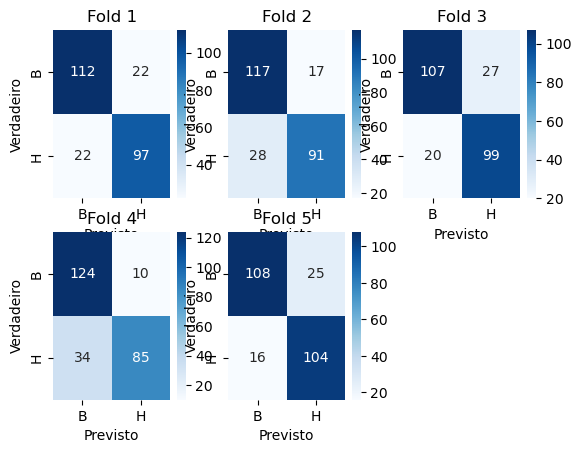

In [8]:
for fold, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels)):
    print(f"\n--- Fold {fold+1}/{n_splits} ---")

    train_paths, val_paths = image_paths[train_idx], image_paths[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]

    train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
    val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

    train_ds = (train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
                .shuffle(buffer_size=len(train_paths))
                .batch(batch_size)
                .prefetch(tf.data.AUTOTUNE))
    val_ds = (val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
              .batch(batch_size)
              .prefetch(tf.data.AUTOTUNE))

    model = create_model()

    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=25,
        mode='max', # 'max' para acurácia, 'min' para perda
        restore_best_weights=True,
        verbose=1
    )

    rlr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.2, patience=15, verbose=True)

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[early_stopping, rlr],
        verbose=1
    )

    best_epoch_index = np.argmax(history.history['val_accuracy']) if 'val_accuracy' in history.history else -1
    if best_epoch_index == -1: # fallback para perda se acurácia não estiver disponível ou for monitorada
        best_epoch_index = np.argmin(history.history['val_loss'])

    val_loss = history.history['val_loss'][best_epoch_index]
    val_acc = history.history['val_accuracy'][best_epoch_index]
    val_prec = history.history.get('val_precision', [None])[best_epoch_index]
    val_rec = history.history.get('val_recall', [None])[best_epoch_index]

    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_acc)
    val_precision_per_fold.append(val_prec)
    val_recall_per_fold.append(val_rec)

    f1 = 2 * (val_prec * val_rec) / (val_prec + val_rec + 1e-7) if val_prec is not None and val_rec is not None else None
    f1_per_fold.append(f1)

    print(f"Score for fold {fold+1}: Loss={val_loss:.4f}; Accuracy={val_acc:.4f}; Precision={val_prec:.4f}; Recall={val_rec:.4f}; F1-Score={f1:.4f}")

    y_pred_probs = model.predict(val_ds)
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

    y_true_list = []
    for _, y_batch in val_ds:
        y_true_list.append(y_batch.numpy())
    y_true = np.concatenate(y_true_list, axis=0)


    # Gráfico de Confusão para o fold atual como um subplot
    cm = confusion_matrix(y_true, y_pred)
    total_cm += cm # Acumula a matriz de confusão

    plt.subplot(n_rows, n_cols, fold + 1) # (linhas, colunas, índice do subplot)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["B", "H"], yticklabels=["B", "H"])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(f'Fold {fold+1}')

In [9]:
plt.tight_layout() # Ajusta automaticamente os parâmetros do subplot para evitar sobreposição
plt.suptitle('Matriz de confusão por fold', y=1.02, fontsize=16) # Título geral para os subplots
plt.show()

<Figure size 640x480 with 0 Axes>

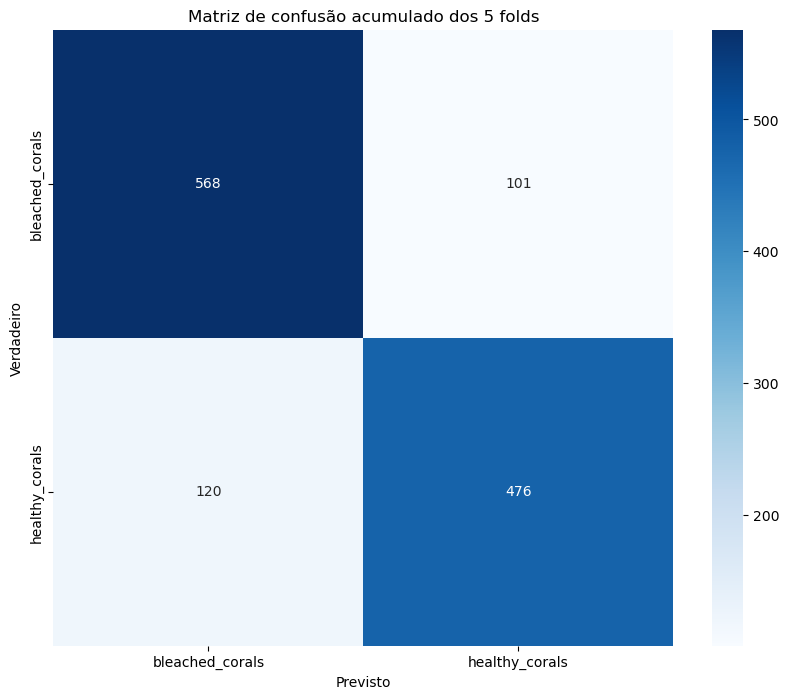

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(total_cm, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de confusão acumulado dos 5 folds')
plt.show()

In [11]:
print("\n" + "="*50)
print("Resultados Finais da Validação Cruzada K-Folds")
print("="*50)

def print_metric_summary(name, values):
    mean = np.mean(values)
    std = np.std(values)
    print(f"{name}: Média={mean:.4f} (+/- {std:.4f})")

print_metric_summary("Acurácia", val_accuracy_per_fold)
print_metric_summary("Precisão", val_precision_per_fold)
print_metric_summary("Recall", val_recall_per_fold)
print_metric_summary("F1-Score", f1_per_fold)
print_metric_summary("Loss", val_loss_per_fold)


Resultados Finais da Validação Cruzada K-Folds
Acurácia: Média=0.8253 (+/- 0.0077)
Precisão: Média=0.8289 (+/- 0.0377)
Recall: Média=0.7985 (+/- 0.0534)
F1-Score: Média=0.8110 (+/- 0.0140)
Loss: Média=0.4632 (+/- 0.0181)


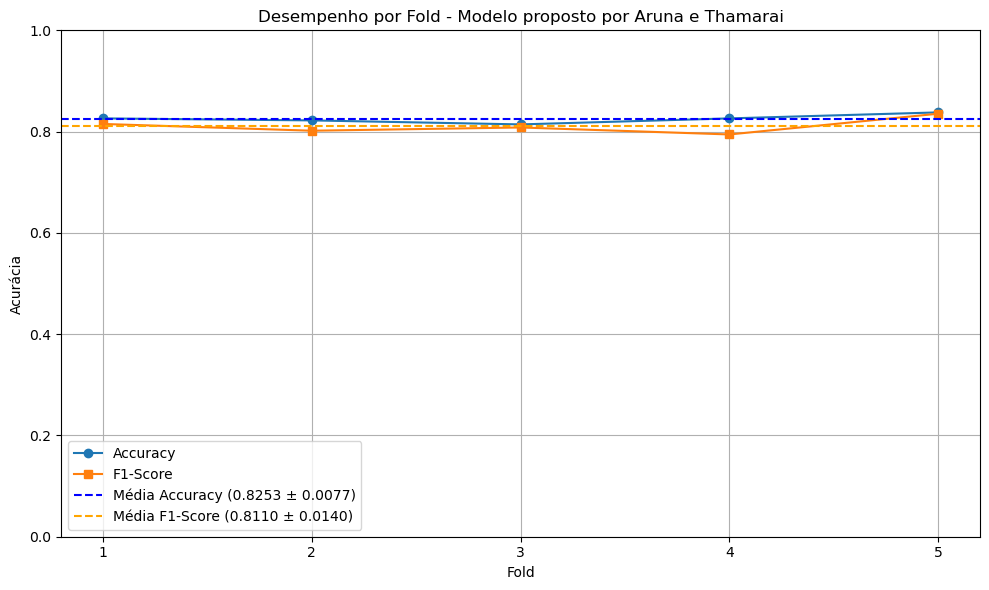

In [12]:
folds = np.arange(1, n_splits + 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(folds, val_accuracy_per_fold, marker='o', label='Accuracy')
plt.plot(folds, f1_per_fold, marker='s', label='F1-Score')

# Média e desvio padrão como linhas horizontais
mean_acc = np.mean(val_accuracy_per_fold)
std_acc = np.std(val_accuracy_per_fold)
mean_f1 = np.mean(f1_per_fold)
std_f1 = np.std(f1_per_fold)

plt.axhline(mean_acc, color='blue', linestyle='--', label=f'Média Accuracy ({mean_acc:.4f} ± {std_acc:.4f})')
plt.axhline(mean_f1, color='orange', linestyle='--', label=f'Média F1-Score ({mean_f1:.4f} ± {std_f1:.4f})')

plt.title('Desempenho por Fold - Modelo proposto por Aruna e Thamarai')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.xticks(folds)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()